In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 14(a)

In [12]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5*x1 + rng.normal(size=100)/10
y = 2 + 2*x1 + 0.3*x2 + rng.normal(size=100)

# 14(b)

In [3]:
np.corrcoef(x1, x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

Correlation between x1 and x2 is 0.7723245

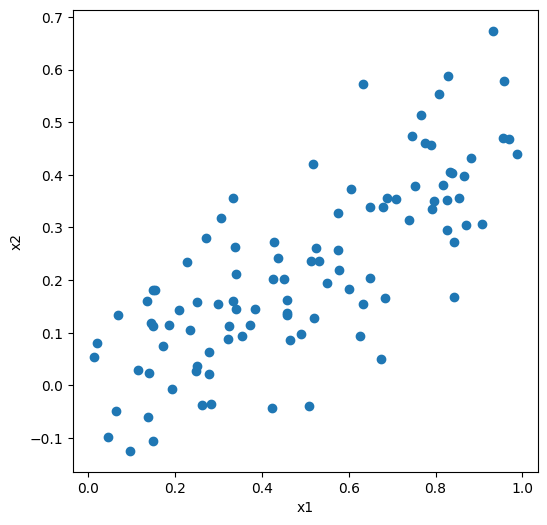

In [4]:
ax = plt.subplots(figsize=(6, 6))[1]
ax.scatter(x1, x2)
ax.set_xlabel("x1")
ax.set_ylabel("x2");

# 14(c)

In [5]:
X_model_matrix = pd.DataFrame({"intercept":np.ones(100), "x1":x1, "x2":x2})
X_model_matrix

,intercept,x1,x2
0,1.0,0.956002,0.469359
1,1.0,0.207682,0.142509
2,1.0,0.828445,0.587699
3,1.0,0.149282,0.181141
4,1.0,0.512805,0.236458
...,...,...,...
95,1.0,0.427256,0.273142
96,1.0,0.790513,0.456659
97,1.0,0.531602,0.236308
98,1.0,0.013037,0.054343


In [6]:
result = sm.OLS(y, X_model_matrix).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.76e-08
Time:                        20:10:10   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) estimated coeffs are, B0 is 1.9759, B1 is 1.6154 and B2 is 0.9428.
2) True coeffs are, B0 is 2, B1 is 2 and B2 is 0.3.
3) Therefore error rates respectively are 1.2%, 19.23% and 214.266%.(True val-estimatedval)/True val
4) We can reject null hypothesis for B1. However we can't reject null hypothesis for B2.

# 14(d)

In [7]:
X_model_matrix_new = pd.DataFrame({"intercept":np.ones(100), "x1":x1})
X_model_matrix_new

,intercept,x1
0,1.0,0.956002
1,1.0,0.207682
2,1.0,0.828445
3,1.0,0.149282
4,1.0,0.512805
...,...,...
95,1.0,0.427256
96,1.0,0.790513
97,1.0,0.531602
98,1.0,0.013037


In [8]:
result_new = sm.OLS(y, X_model_matrix_new).fit()
result_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.37e-08
Time:                        20:16:05   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) Now error rates have been decreased for estimated B1 and it is more comparable to the true value of B1.
2) t-statistics value of B1 has improved by a lot.
3) Therefore, we can reject null hypothesis Ho:B1=0.

# 14(e)

In [9]:
X_model_matrix2 = pd.DataFrame({"intercept":np.ones(100), "x2":x2})
X_model_matrix2

,intercept,x2
0,1.0,0.469359
1,1.0,0.142509
2,1.0,0.587699
3,1.0,0.181141
4,1.0,0.236458
...,...,...
95,1.0,0.273142
96,1.0,0.456659
97,1.0,0.236308
98,1.0,0.054343


In [10]:
result2 = sm.OLS(y, X_model_matrix2).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           7.43e-07
Time:                        20:18:31   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) it seems like the coeff of x2 absorbs the fact that x1 was there. That's why it is 2.9 as estimated.
2) Now we can reject the null hypothesis Ho:B2=0.

# 14(f)

Yes, the results contradict each other. t-statistics changes for x1 and x2. and therefore, null hypothesis testing gives different result.

It is because of the problem of collinearity. When we removed x1, collinearity problem gets solved and thus, it's t-statistic value tends to 0 and it absorbs the dependance relation of x1 in it's new estimated coefficient.

# 14(g)

In [13]:
x1_new = np.concatenate([x1, [0.1]])
x2_new = np.concatenate([x2, [0.8]])
y_new = np.concatenate([y, [6]])

In [14]:
x1_new

array([0.95600171, 0.20768181, 0.82844489, 0.14928212, 0.51280462,
       0.1359196 , 0.68903648, 0.84174772, 0.425509  , 0.956926  ,
       0.82533291, 0.33821531, 0.57576055, 0.75330186, 0.82710394,
       0.93343847, 0.14499469, 0.74558021, 0.13935139, 0.90652876,
       0.22611443, 0.85323975, 0.30631787, 0.96983037, 0.51783421,
       0.32247456, 0.28243352, 0.605865  , 0.33376446, 0.67864877,
       0.15442507, 0.24977552, 0.86989425, 0.60036782, 0.26198306,
       0.1494149 , 0.13678915, 0.24892094, 0.38282467, 0.64907906,
       0.83756376, 0.77603195, 0.33951558, 0.14856874, 0.45701939,
       0.43786436, 0.57421759, 0.37326922, 0.63382506, 0.11464436,
       0.23309047, 0.76724102, 0.98712427, 0.80800108, 0.84296564,
       0.79568268, 0.45684131, 0.73867068, 0.57845499, 0.45073557,
       0.27102442, 0.86460315, 0.06865567, 0.81673446, 0.881835  ,
       0.42351639, 0.83322931, 0.34101671, 0.51979151, 0.54920645,
       0.19287718, 0.33321689, 0.27752456, 0.45755893, 0.67484

In [15]:
x2_new

array([ 0.46935859,  0.14250933,  0.5876991 ,  0.18114137,  0.23645761,
        0.15961627,  0.35623248,  0.27273555,  0.20208935,  0.57793172,
        0.35303018,  0.2627067 ,  0.25721198,  0.37929993,  0.29443701,
        0.67373709,  0.11784107,  0.47363309,  0.02440477,  0.30692392,
        0.23421807,  0.35543341,  0.31836418,  0.46780497,  0.42137018,
        0.0883346 , -0.03518212,  0.37274155,  0.16007735,  0.33905232,
        0.18208331,  0.03667247,  0.30548409,  0.18334024, -0.03722513,
       -0.10615476, -0.06012932,  0.0270601 ,  0.14551882,  0.20310345,
        0.40381528,  0.46114066,  0.14458386,  0.11224807,  0.1327756 ,
        0.24264669,  0.32752244,  0.11481427,  0.15538837,  0.02900969,
        0.10477493,  0.51381823,  0.43930505,  0.55260941,  0.16740748,
        0.35114908,  0.16273915,  0.31386909,  0.21852171,  0.20212454,
        0.27944727,  0.3983034 ,  0.13313034,  0.37971576,  0.43237428,
       -0.04259444,  0.4057857 ,  0.21091055,  0.12787833,  0.19

In [16]:
y_new

array([4.35697711, 3.67778851, 3.48207881, 2.36909332, 1.41329539,
       4.20750629, 2.57167458, 3.91937236, 3.37262726, 3.12696558,
       3.56116566, 3.28659541, 2.99093735, 3.17884697, 3.29016738,
       3.23154962, 2.02457872, 3.86499698, 2.60842138, 4.86156336,
       2.45220933, 3.18771988, 3.4247815 , 4.31264243, 4.04213658,
       2.74898481, 2.97663313, 3.60829046, 3.33659211, 2.39586587,
       2.16177801, 2.59150777, 5.43193727, 3.08958983, 2.87226452,
       1.99681481, 0.12091645, 3.644074  , 3.38606229, 4.50012386,
       2.35809596, 3.87742528, 2.80321893, 0.68900189, 3.32236151,
       2.25527731, 3.64036741, 1.04633436, 2.35023716, 1.44445948,
       0.89747455, 3.65158127, 5.30946703, 3.6709363 , 4.26794145,
       5.06154084, 3.42008377, 3.11252106, 1.23449794, 3.22092493,
       2.21268616, 3.30792402, 2.8090962 , 4.20233228, 2.25403897,
       2.98808164, 3.38177348, 3.50598973, 2.97210161, 3.98904757,
       1.64301736, 2.29445824, 1.94060257, 2.69267502, 3.04120

### Model-1

In [17]:
X_model_matrix3 = pd.DataFrame({"intercept":np.ones(101), "x1_new":x1_new, "x2_new":x2_new})
X_model_matrix3

,intercept,x1_new,x2_new
0,1.0,0.956002,0.469359
1,1.0,0.207682,0.142509
2,1.0,0.828445,0.587699
3,1.0,0.149282,0.181141
4,1.0,0.512805,0.236458
...,...,...,...
96,1.0,0.790513,0.456659
97,1.0,0.531602,0.236308
98,1.0,0.013037,0.054343
99,1.0,0.019875,0.079619


In [18]:
# Using both x1_new and x2_new
result3 = sm.OLS(y_new, X_model_matrix3).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.60e-08
Time:                        20:28:37   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0618      0.192     10.720      0.000       1.680       2.443
x1_new         0.8575      0.466      1.838      0.069      -0.068       1.783
x2_new         2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) t-statistics values for all coeff estimate changes and now we can't reject null hypothesis for B1 but we can reject null hypothesis for B2.
2) R-squared value increases

### Checking Leverage statistics for Model-1

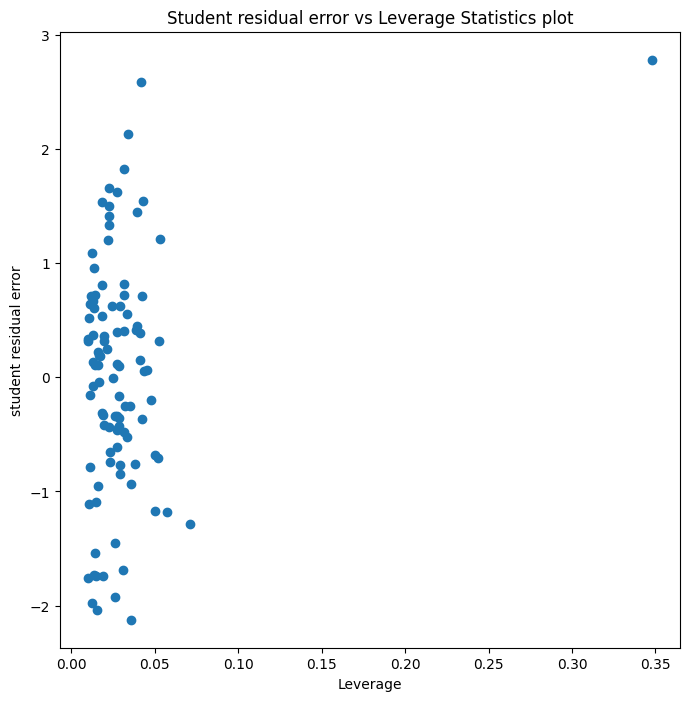

In [22]:
infl3 = result3.get_influence()
outlier3 = result3.outlier_test()
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(infl3.hat_matrix_diag, outlier3["student_resid"])
ax.set_xlabel("Leverage")
ax.set_ylabel("student residual error")
ax.set_title("Student residual error vs Leverage Statistics plot");

##### Therefore, we can conclude that there is no sign of outlier, however there is a sign of high-leverage point.

### Model-2

In [19]:
# Using only x1_new
X_model_matrix4 = pd.DataFrame({"intercept":np.ones(101), "x1_new":x1_new})
result4 = sm.OLS(y_new, X_model_matrix4).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           9.23e-07
Time:                        20:30:12   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0739      0.201     10.310      0.000       1.675       2.473
x1_new         1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) No change in t-statistics. However R-squared value decreases by a lot. and there is ofc a change in coeff estimates `by a major one`.

### Checking Leverage statistics for Model-2

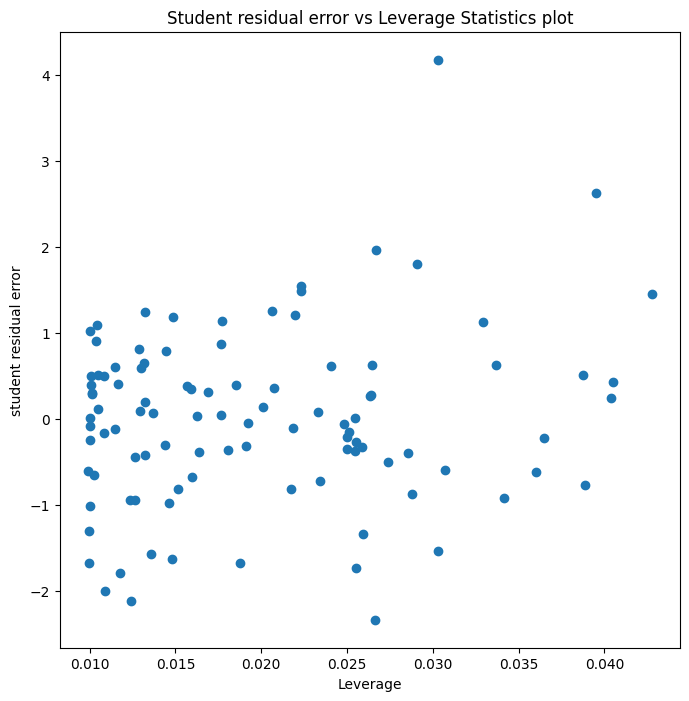

In [23]:
infl4 = result4.get_influence()
outlier4 = result4.outlier_test()
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(infl4.hat_matrix_diag, outlier4["student_resid"])
ax.set_xlabel("Leverage")
ax.set_ylabel("student residual error")
ax.set_title("Student residual error vs Leverage Statistics plot");

##### Since outlier needs atleast >=3 from max. Therefore there is no evidence of outliers as well as high-leverage points.

### Model-3

In [20]:
# Using only x2_new
X_model_matrix5 = pd.DataFrame({"intercept":np.ones(101), "x2_new":x2_new})
result5 = sm.OLS(y_new, X_model_matrix5).fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           3.13e-08
Time:                        20:31:18   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2840      0.151     15.088      0.000       1.984       2.584
x2_new         3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) No change in t-statistics, however there are changes in coeff estimates`(by a major one)` and R-squared value increases by a lot.

### Checking Leverage statistics for Model-3

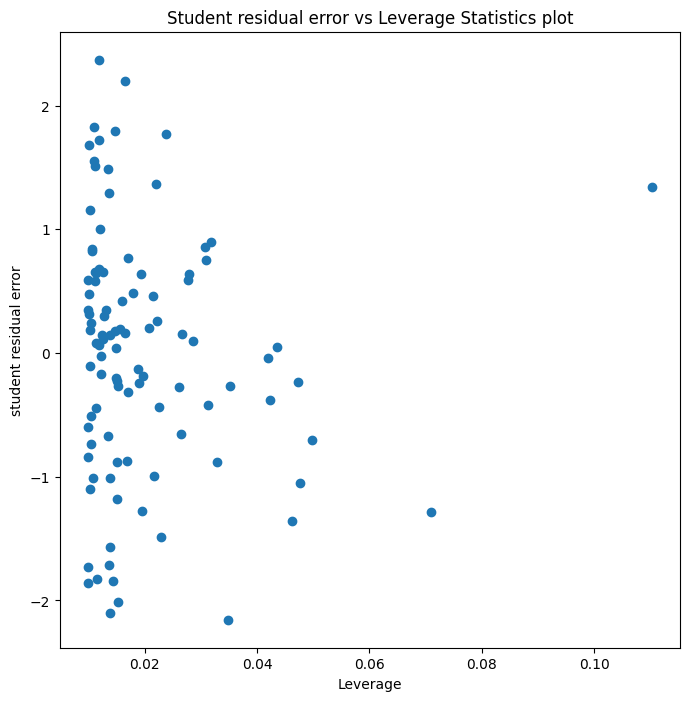

In [24]:
infl5 = result5.get_influence()
outlier5 = result5.outlier_test()
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(infl5.hat_matrix_diag, outlier5["student_resid"])
ax.set_xlabel("Leverage")
ax.set_ylabel("student residual error")
ax.set_title("Student residual error vs Leverage Statistics plot");

##### Since outlier needs atleast >=3 from max value in student residual error plot. Therefore there is no evidence for outlier.

##### (p+1)/n = 2/100 = 0.05. And hence there is evidence of High-leverage point.

## Therefore, we can conclude that evidence of outlier and high-leverage points depends on different models.